### 📘 **Welcome to Your First Notebook**

<span style="color:slateblue"><strong>This notebook is a hands-on introduction to using Jupyter Notebooks for data analysis.</strong></span>  
You'll learn how to run code, explore data, write notes, and understand the interface along the way.

This text you're reading is in a **cell**, specifically a **Markdown cell** — used to write formatted text, explanations, and notes. Instead of using buttons or menus, you add simple symbols (like `#`, `*`, or `[]`) to control how the text appears.  

[**Learn about Markdown by here**](https://www.markdownguide.org/)    

You can **see the cell type** in the bottom-right corner — it will say `"Markdown"` or `"Code"`. By pressing `Shift` `+` `Enter` to **render** the Markdown. Double-click the cell to go back into **edit mode** and make changes.

In [1]:
#  !!!!!  Time to Code  !!!!
#
# This is a code cell — a place to write and run Python code.
# You'll notice in the bottom-right corner of this cell it says "Python",
# which tells you it's a code cell using the Python language kernel.
# Try running this cell by clicking inside it and pressing Shift + Enter.
# You’ll see the result printed below.

print("Hello, Jupyter!")

Hello, Jupyter!


## Organizing Your Analysis

One of the strengths of Jupyter Notebooks is how you can break your work into <span style="color:darkblue"><strong>clear, logical steps</strong></span> using cells.

Think of each **code cell** as a single action or idea:  
- 📥 Load your data in one cell  
- 🔍 Explore it in another  
- 📊 Visualize or transform it in the next  

This structure makes your analysis easier to <span style="color:darkgreen"><strong>follow, debug, and share</strong></span> — whether you're revisiting it later or handing it off to someone else.

---

In between code, use **Markdown cells** to capture your  
<span style="color:#8B008B"><strong>thoughts, assumptions, and observations</strong></span>.

This is especially helpful when:  
- You're working through ideas and want to reflect as you go  
- You're sharing the notebook with others  
- You're collaborating, and want teammates to follow your reasoning  

Think of it as building a <span style="color:firebrick"><strong>chain of thought</strong></span> — guiding anyone reading the notebook through not just **what** you did, but **why** you did it.

Insert a new cell using the **+** button. You can also use keyboard shortcuts to enhance your efficiency.   
[Jupyter Notebook Keyboard Shortcuts Cheat Sheet](https://mljar.com/blog/jupyter-notebook-shortcuts-cheatsheet/)

### Let's perform a simple data analysis using fake vehicle sales data to demonstrate how to break the analysis up into steps

<span style="color:#8B008B"><strong>How long does it typically take for a vehicle to sell after it's been wholesaled?</strong></span>

We’ll look at the time difference between the **WholesaleDate** and the **SaleDate** for each vehicle in the dataset.

This kind of focused question helps demonstrate the power of notebooks — we can break the problem into steps, write code to explore it, visualize the results, and document insights along the way.

In [ ]:
# Load Vehicle Sales Data from CSV
import pandas as pd

# Load dataset from the relative path to a pandas dataframe
df = pd.read_csv("../data/fake_sales_data.csv")

# Display the first few rows of the data
df.head()

,Model,Trim,Color,Year,SaleDate,WholesaleDate,MSRP,SalePrice,Region,Dealer,VIN
0,Prius,Limited,Black,2018,2020-02-29,2022-11-08,24798,26696,South,Dealer_3,JT778346
1,Corolla,Limited,Green,2013,2023-06-11,2023-11-11,47504,24775,South,Dealer_31,JT138801
2,Corolla,XSE,Gray,2020,2021-02-08,2021-08-30,22032,25510,South,Dealer_47,JT311802
3,Prius,XSE,Black,2013,2022-07-09,2022-03-18,42629,24644,East,Dealer_50,JT267099
4,RAV4,XSE,Blue,2010,2023-04-27,2023-12-11,45701,45359,West,Dealer_33,JT385959


## Exploring the Data

Now that the dataset is loaded, the next step is to get a quick overview of what you're working with.

This includes:
- Seeing how many rows and columns there are
- Understanding what each column contains
- Checking for missing values
- Getting basic summary statistics

These steps help you decide what to clean, analyze, or visualize — and give you a sense of the data’s overall shape and quality.

In [ ]:
# Run three commands in one cell

df.info()                
df.describe()            
df.isnull().sum()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          1000 non-null   object
 1   Trim           1000 non-null   object
 2   Color          1000 non-null   object
 3   Year           1000 non-null   int64 
 4   SaleDate       1000 non-null   object
 5   WholesaleDate  1000 non-null   object
 6   MSRP           1000 non-null   int64 
 7   SalePrice      1000 non-null   int64 
 8   Region         1000 non-null   object
 9   Dealer         1000 non-null   object
 10  VIN            1000 non-null   object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


Model            0
Trim             0
Color            0
Year             0
SaleDate         0
WholesaleDate    0
MSRP             0
SalePrice        0
Region           0
Dealer           0
VIN              0
dtype: int64

## Understanding Output in a Code Cell

In a Jupyter Notebook, only the **last expression** in a code cell will automatically display output — unless a function explicitly prints something.

- `df.info()` **prints** its result to the screen, so it always shows.
- `df.describe()` **returns** a DataFrame, but won’t display unless it’s the last line **OR** wrapped in `print()`. Like `print(df.describe()`)`
- `df.isnull().sum()` also returns a value, and since it's the **last line**, Jupyter shows it in the output by default.

To see the output of multiple commands in one cell, either:
- Use `print()` for the ones you want to show, or
- Split them into separate cells for clarity.

In [11]:
# To perform the analysis we'll need to Convert the WholesaleDate and
# SaleDate columns to datetime format as they are currently object data types
df["SaleDate"] = pd.to_datetime(df["SaleDate"])
df["WholesaleDate"] = pd.to_datetime(df["WholesaleDate"])

# Calculate days between wholesale and sale and store the result in a new column DaysToSell
df["DaysToSell"] = (df["SaleDate"] - df["WholesaleDate"]).dt.days

# Preview the updated DataFrame
df[["SaleDate", "WholesaleDate", "DaysToSell"]].head()

,SaleDate,WholesaleDate,DaysToSell
0,2020-02-29,2022-11-08,-983
1,2023-06-11,2023-11-11,-153
2,2021-02-08,2021-08-30,-203
3,2022-07-09,2022-03-18,113
4,2023-04-27,2023-12-11,-228


## Fixing mistakes and Iterating

One of the best things about using a notebook is that **you don’t have to get everything right on the first try**. If you make a mistake in a cell — whether it’s a typo, logic error, or wrong calculation — you can simply update the code and **re-run the cell**. You don’t need to start over or re-import your data from scratch. Your data is already in memory, and your notebook keeps track of each step as you go. **This makes it easy to experiment, test ideas, and fix issues without breaking your workflow.**

Now, let's visualize our data! 



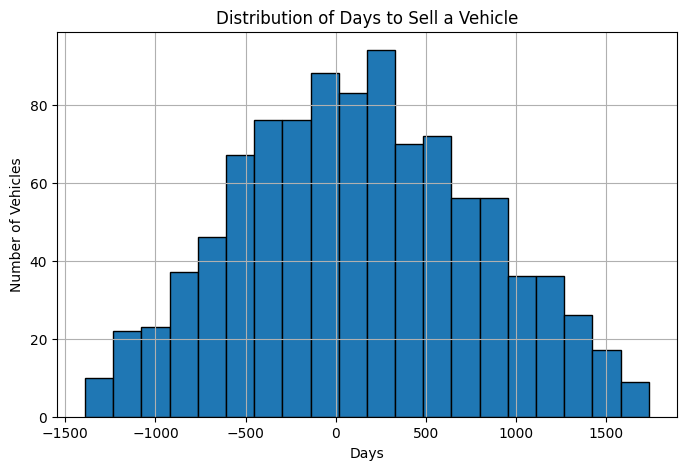

In [12]:
import matplotlib.pyplot as plt

# 📊 Plot a histogram of days to sell
plt.figure(figsize=(8, 5))
plt.hist(df["DaysToSell"], bins=20, edgecolor="black")
plt.title("Distribution of Days to Sell a Vehicle")
plt.xlabel("Days")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.show()